# <span style="color:blue"> Numerical Simulation Laboratory (NSL) </span>
    
##  <span style="color:blue"> Edoardo Baraldi - Notebook 3 </span>   

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### For comparison, Black-Scholes analytic solution:

In [8]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


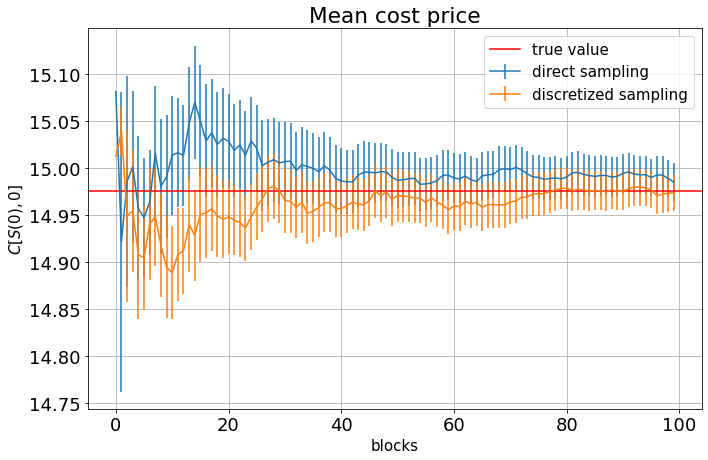

In [16]:
import numpy as np
import matplotlib.pyplot as plt 

M=1000000   #number of total throws
N=100       #nuber of blocks
L=int(M/N)  #number of throws in each block

plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"]= (11,7)

c_avg, err_c =np.loadtxt("Data3_1_C", unpack =True, usecols=(0,1), delimiter=",")
c_avg_disc, err_c_disc =np.loadtxt("Data3_1_C_disc", unpack =True, usecols=(0,1), delimiter=",")

x=np.arange(N)

plt.errorbar(x, c_avg, yerr=err_c, label="direct sampling")
plt.errorbar(x, c_avg_disc, yerr=err_c_disc, label="discretized sampling")
plt.axhline(call, color='r', label='true value')
plt.ylabel(r'$C[S(0),0]$', fontsize=15)
plt.xlabel("blocks", fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.title(r'Mean cost price')
plt.show()

Il grafico mostra la stima del valore medio progressivo del prezzo per una call europea calcolata al tempo iniziale. Le stime dei valori sono state ottenute attraverso l'utilizzo di una media a blocchi con $10^6$ estrazioni suddivise in $100$ blocchi, per un totale di $10^4$ estrazioni per blocco. Il valore medio è stato calcolato in due differenti modi: direttamente ed in maniera discretizzata.

Il metodo diretto consiste nel campionare il prezzo dell'attività $S$ solo al tempo finale $T$. Da valore trovato si può ottenere quindi il valore della funzione costo a $t=0$ da: $$C[S(0),0]= e^{rT}max{0, S(T) -K},$$ dove $r$ è la volatilità e $K$ è il prezzo di esercizio. 
Quel che si ottiene è una leggera sovrastima del costo medio rispetto al valore aspettato calcolato in maniera analitica. Nonostante questo, gli errori statistici connessi ai valori medi fanno in modo che essi risultino compatibili con il valore aspettato.

Il calcolo del prezzo in maniera discretizzata consiste nel campionare il prezzo dell'attività $S$ in $100$ tempi successivi in cui è stato frazionato l'intervallo $[0;T]$ fino ad ottenere $S(T)$. In questo caso si nota come il valore della call media al tempo iniziale calcolato su un sufficente grande numero di blocchi sia più che compatibile con il valore aspettato.

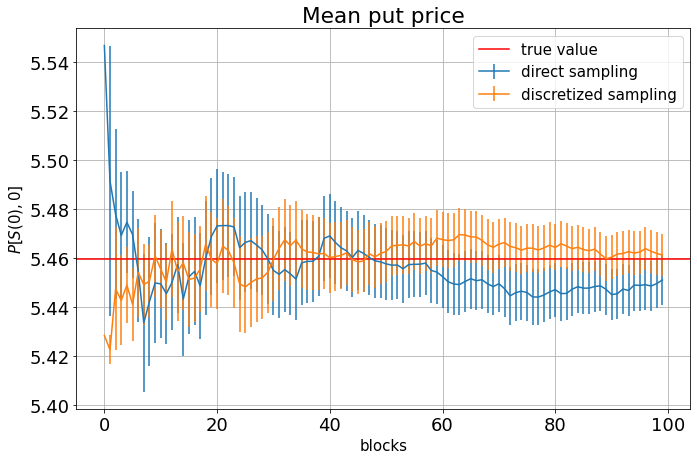

In [15]:
p_avg, err_p =np.loadtxt("Data3_1_P", unpack =True, usecols=(0,1), delimiter=",")
p_avg_disc, err_p_disc =np.loadtxt("Data3_1_P_disc", unpack =True, usecols=(0,1), delimiter=",")

x=np.arange(N)

plt.errorbar(x, p_avg, yerr=err_p, label="direct sampling")
plt.errorbar(x, p_avg_disc, yerr=err_p_disc, label="discretized sampling")
plt.axhline(put, color='r', label='true value')
plt.ylabel(r'$P[S(0),0]$', fontsize=15)
plt.xlabel("blocks", fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.title(r'Mean put price')
plt.show()

Il grafico mostra la stima del valore medio progressivo del prezzo per una put europea calcolata al tempo iniziale. Le stime dei valori sono state ottenute attraverso l'utilizzo di una media a blocchi con $10^6$ estrazioni suddivise in $100$ blocchi, per un totale di $10^4$ estrazioni per blocco. Anche in questo caso il valore medio è stato calcolato in due differenti modi: direttamente ed in manera discretizzata.

Come è possibile notare dal grafico il valore medio, determinato grazie ad una media a blocchi, per un elevato numero di blocchi porta  ad una sottostima del valore di put inziale. Anche qui gli errori statistici però fanno si che esso risulti comunque compatibile con il valore aspettato.

Come nel caso precedente, il metodo basato su una discretizzazione per il calcolo del prezzo di attività al tempo $T$ si dimostri più preciso rispetto ad calcolo diretto.